# Utilizando EMCEE

La libreria EMCEE https://emcee.readthedocs.io/en/stable/ implementa en python el algoritmo de muestreo de Goodman & Weare ver https://msp.org/camcos/2010/5-1/p04.xhtml y https://iopscience.iop.org/article/10.1086/670067
El algoritmo emcee usa un enjambre de "caminantes" (Monis) en lugar de uno solo para explorar el espacio de soluciones.
En lugar de que cada caminante se mueva al azar desde donde está, un caminante (A) escoge a otro caminante (B) al azar. Luego, traza una línea imaginaria entre ellos y "se estira" a lo largo de esa línea, saltando a un nuevo punto.

In [1]:
# instalar el paquete emcee
!pip install emcee corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import emcee # MCMC
import matplotlib.pyplot as plt
import scipy.stats as stats
from corner import corner # para graficar las distribuciones

Se debe proveer el logaritmo natural de la pdf

In [18]:
def log_gaussian(theta):
  """ Gaussiana sin correlacion"""
  sigma = 1
  x, y = theta

  return -(x**2 + y**2)

def log_prob_banana(theta):
  x, y = theta
  return -((1 - x)**2 + 100 * (y - x**2)**2) / 20.0

def log_prob_four_well(theta):
    x, y = theta
    potential_x = (x**2 - 4)**2
    potential_y = (y**2 - 4)**2

    return -(potential_x + potential_y) / 2.0

In [11]:
ndim = 2 # las distribuciones dependen de 2 variables
monis = 10 # numero de "monis"
nsteps = 20000 # pasos
burnin = 500 # calentamiento
initial = np.random.uniform(-.8, .8, size=(monis,ndim))
sampler = emcee.EnsembleSampler(monis, ndim, log_gaussian) # instanciar el muestreador
sampler.run_mcmc(initial, nsteps, progress=False) # correr el muestreador

State([[ 0.22602768 -0.52166453]
 [-0.68997516  0.66007982]
 [ 1.47858406  0.38380271]
 [ 0.60745957 -1.136074  ]
 [-0.10184142  0.15540184]
 [-0.07000783 -0.23065531]
 [ 0.52059885  0.69359394]
 [ 0.80919102 -0.01631488]
 [-1.34297199 -0.03512489]
 [-0.87976893 -0.37180481]], log_prob=[-0.32322239 -0.91177109 -2.33351535 -1.65967126 -0.03452141 -0.05810297
 -0.75209572 -0.65505628 -1.80480752 -0.9122322 ], blobs=None, random_state=('MT19937', array([4119604067, 2008327062, 2124855522, 3078166552, 2650213316,
       3409229204, 3635198619, 4254965978, 3967734558, 1517240411,
       1240256475,  161980111, 1908610966, 2174831511,  735607136,
        296834132, 2233818541, 3574417531, 3683319935, 2313437492,
       1981598060, 3201938275, 3710472774,  327523220, 1377880025,
        733769733, 3797059316,  906302426, 4244549619, 3907883755,
       1069543192,  759437008,  604466941, 1687317680, 2745943324,
       1890300595, 1128512791, 2349722131,  849845538,  153106056,
        59213263

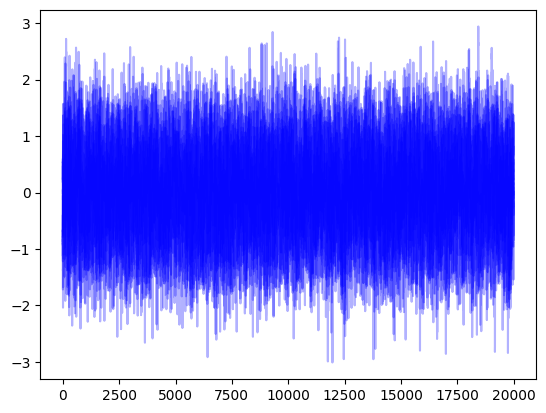

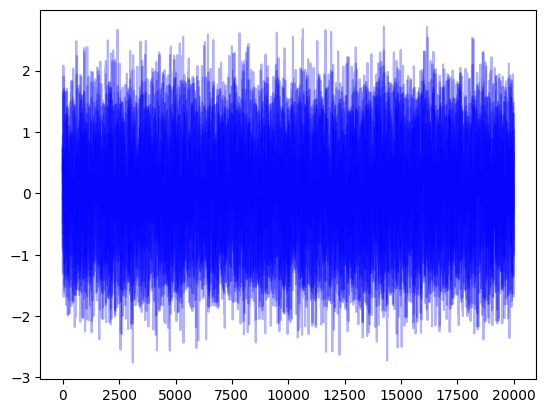

In [21]:
plt.figure()
plt.plot(sampler.get_chain()[:, :, 1], color='blue', alpha=0.3)
plt.show()
plt.figure()
plt.plot(sampler.get_chain()[:, :, 0], color='blue', alpha=0.3)
plt.show()

In [23]:
# Extraer las muestras y descartar los datos de calentamiento
samples = sampler.get_chain(discard=burnin, flat=True) # flat true para poner todas la muestras en solo dos listas, una para cada variable
print('estimated size =', monis*(nsteps-burnin))
samples.shape

estimated size = 195000


(195000, 2)

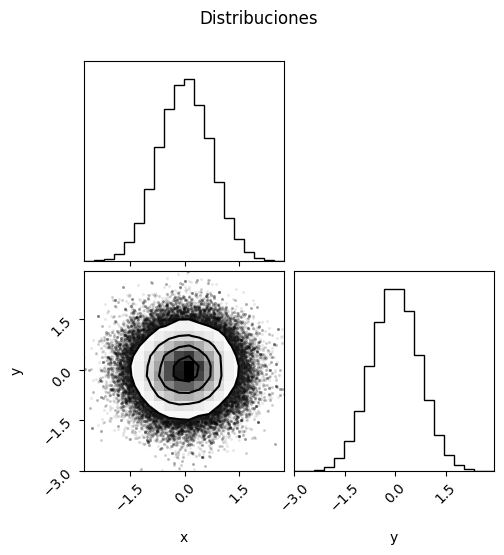

In [25]:
fig = corner(samples, labels=['x','y'])
plt.suptitle("Distribuciones", y=1.02)
plt.show()